## Punto 1 
### Se extraen dos bases de datos de Kaggle de ventas de diferentes empresas una de Walmart y otra de otra tienda

# Punto 2
## Carga y exploracion

In [1]:
import pandas as pd             #Se importa pandas para trabajar las bases de datos de una mejor manera
import numpy as np              #Se importa numpy por si se necesita hacer alguna operación con matrices
import matplotlib.pyplot as plt #Se importa matplotlib.pyplot para la parte de la visualización 
import seaborn as sns           #Se importa seaborn para tambien temas de la visualizacion
import datetime as dt           #Se importa datetime para manejar formatos de fecha

In [2]:
walmart=pd.read_csv('C:/Users/ce02971/OneDrive - Allianz/Santiago/Python_Especializacion/Visualizacion de datos/features.csv')
#Se importa la base de datos de walmart

ventas= pd.read_csv('C:/Users/ce02971/OneDrive - Allianz/Santiago/Python_Especializacion/Visualizacion de datos/Superstore.csv', encoding='latin-1')
#Se importa la base de datos de ventas 

### Walmart

In [3]:
walmart.info() #Se hace una primera descripcion de la base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [4]:
walmart.shape #Se conoce la dimension de la base de datos

(8190, 12)

In [5]:
walmart.head() #Se imprimen los primeros 5 registros de la base de datos

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
walmart.isnull() #Se revisan cuales son los valores nulos por cada columna

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [7]:
walmart.columns #Se revisan las columnas de la base de datos

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

### Ventas

In [8]:
ventas.info() #Se hace un primer acercamiento a la base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
ventas.head() #Se observa la base de datos los primeros 5 registros 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
ventas.isnull() #Se revisan los valores nulos de la base de datos

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
ventas.isnull().sum() #Se suman la cantidad de valores nulos 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
ventas.columns #Se revisan las columnas de la base de datos

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
ventas.shape #Se revisa el tamaño de la base de datos 

(9994, 21)

# 3 
## Manipulacion 

### Walmart

In [14]:
walmart.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [15]:
walmart=walmart.drop(['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4', 'MarkDown5'], axis=1) #Se eliminan las columnas\
                                                                                             #que no son necesarias 
walmart

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False


In [16]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [17]:
walmart['Date'] = pd.to_datetime(walmart['Date'], format='%Y-%m-%d') #Se pone en el formato correcto, no se puede hora porque la base de datos no tiene horas
walmart.info() #se comprueba que se hiciera correctamente la transformacion 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   CPI           7605 non-null   float64       
 5   Unemployment  7605 non-null   float64       
 6   IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 392.0 KB


In [18]:
walmart['Año'] = walmart['Date'].dt.year #Se crea la columna de año
walmart['Mes'] = walmart['Date'].dt.month #Se crea la columna de mes
walmart['Nombre_Mes'] = walmart['Date'].dt.month_name() #se crea la columna del nombre del mes 
walmart[['Año', 'Mes','Nombre_Mes']]

,Año,Mes,Nombre_Mes
0,2010,2,February
1,2010,2,February
2,2010,2,February
3,2010,2,February
4,2010,3,March
...,...,...,...
8185,2013,6,June
8186,2013,7,July
8187,2013,7,July
8188,2013,7,July


### Ventas

In [19]:
ventas.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [20]:
ventas.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
ventas.drop(['Row ID', 'Customer ID', 'Postal Code'], axis=1) #Se eliminan las columnas que para concepto propio no son relevantes
ventas.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
ventas['Order Date'] = pd.to_datetime(ventas['Order Date'], format='%d-%m-%Y') #Se cambia el formato de la columna Order Date
ventas['Ship Date'] = pd.to_datetime(ventas['Ship Date'], format='%d-%m-%Y') #Se cambia el formato de la columna Ship Date

ventas

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [23]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [24]:
ventas['Año_de_Orden'] = ventas['Order Date'].dt.year 
ventas['Mes_de_Orden'] = ventas['Order Date'].dt.month
ventas['Nombre_Mes_Orden'] = ventas['Order Date'].dt.month_name()

ventas['Año_de_Envio'] = ventas['Ship Date'].dt.year 
ventas['Mes_de_Envio'] = ventas['Ship Date'].dt.month
ventas['Nombre_Mes_Envio'] = ventas['Ship Date'].dt.month_name()

#Se crean las columnas de año, mes y nombre mes, tanto para la fecha de orden como para la fecha de envio

ventas

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Año_de_Orden,Mes_de_Orden,Nombre_Mes_Orden,Año_de_Envio,Mes_de_Envio,Nombre_Mes_Envio
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2013,11,November,2013,11,November
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2013,11,November,2013,11,November
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2013,6,June,2013,6,June
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2012,10,October,2012,10,October
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2012,10,October,2012,10,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,25.2480,3,0.20,4.1028,2011,1,January,2011,1,January
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,91.9600,2,0.00,15.6332,2014,2,February,2014,3,March
9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,258.5760,2,0.20,19.3932,2014,2,February,2014,3,March
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,29.6000,4,0.00,13.3200,2014,2,February,2014,3,March


In [25]:
base_juntas=pd.concat([walmart,pd.DataFrame(ventas)], ignore_index=0)
base_juntas
#Union de las bases de datos, no da resultados utiles porque no son bases comparables

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Año,Mes,Nombre_Mes,...,Sales,Quantity,Discount,Profit,Año_de_Orden,Mes_de_Orden,Nombre_Mes_Orden,Año_de_Envio,Mes_de_Envio,Nombre_Mes_Envio
0,1.0,2010-02-05,42.31,2.572,211.096358,8.106,False,2010.0,2.0,February,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2010-02-12,38.51,2.548,211.242170,8.106,True,2010.0,2.0,February,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2010-02-19,39.93,2.514,211.289143,8.106,False,2010.0,2.0,February,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2010-02-26,46.63,2.561,211.319643,8.106,False,2010.0,2.0,February,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2010-03-05,46.50,2.625,211.350143,8.106,False,2010.0,3.0,March,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.248,3.0,0.2,4.1028,2011.0,1.0,January,2011.0,1.0,January
9990,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.960,2.0,0.0,15.6332,2014.0,2.0,February,2014.0,3.0,March
9991,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,258.576,2.0,0.2,19.3932,2014.0,2.0,February,2014.0,3.0,March
9992,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.600,4.0,0.0,13.3200,2014.0,2.0,February,2014.0,3.0,March


# Punto 4
## Limpieza

### Walmart

In [26]:
walmart.isnull() #Se revisa en que columnas estan lo valores nulos

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Año,Mes,Nombre_Mes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,True,True,False,False,False,False
8186,False,False,False,False,True,True,False,False,False,False
8187,False,False,False,False,True,True,False,False,False,False
8188,False,False,False,False,True,True,False,False,False,False


In [27]:
walmart.isnull().sum() #Se suman los valores nulos de cada colmna

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
Año               0
Mes               0
Nombre_Mes        0
dtype: int64

In [28]:
walmart.dropna() #Se decide eliminar los valores nulos porque no se podian reemplazar por 0 ni por la media por el tipo de columnas

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Año,Mes,Nombre_Mes
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2010,2,February
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,2010,2,February
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,2010,2,February
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,2010,2,February
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,2010,3,March
...,...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,193.442790,8.625,False,2013,3,March
8173,45,2013-04-05,43.94,3.763,193.516047,8.335,False,2013,4,April
8174,45,2013-04-12,57.39,3.724,193.589304,8.335,False,2013,4,April
8175,45,2013-04-19,56.27,3.676,193.589304,8.335,False,2013,4,April


In [29]:
walmart.duplicated() #Se corrobora que valores hay duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
8185    False
8186    False
8187    False
8188    False
8189    False
Length: 8190, dtype: bool

In [30]:
walmart.duplicated().sum() #Se suma cuantos valores estan duplicados

0

In [31]:
walmart.drop_duplicates()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Año,Mes,Nombre_Mes
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2010,2,February
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,2010,2,February
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,2010,2,February
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,2010,2,February
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,2010,3,March
...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False,2013,6,June
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False,2013,7,July
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False,2013,7,July
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False,2013,7,July


In [32]:
walmart.columns # Para el caso de Walmart no se puede hacer validacion cruzada porque no hay columnas calculadas 

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Año', 'Mes', 'Nombre_Mes'],
      dtype='object')

### Ventas

In [33]:
ventas.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Año_de_Orden,Mes_de_Orden,Nombre_Mes_Orden,Año_de_Envio,Mes_de_Envio,Nombre_Mes_Envio
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
ventas.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Año_de_Orden        0
Mes_de_Orden        0
Nombre_Mes_Orden    0
Año_de_Envio        0
Mes_de_Envio        0
Nombre_Mes_Envio    0
dtype: int64

# Punto 4 
## Simplificar

In [35]:
walmart.columns #reviso las columnas 

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Año', 'Mes', 'Nombre_Mes'],
      dtype='object')

In [54]:
#Se hace una agrupacion por nombre del mes y la variable precio de gasolina, se organiza por el precio promedio de la gasolina
agrupacion_1_walmart = walmart.groupby('Nombre_Mes')['Fuel_Price'].mean()
agrupacion_1_walmart=pd.DataFrame(agrupacion_1_walmart)
agrupacion_1_walmart=agrupacion_1_walmart.sort_values('Fuel_Price')
agrupacion_1_walmart

,Fuel_Price
Nombre_Mes,
December,3.226003
February,3.245325
January,3.279174
November,3.333432
October,3.349590
July,3.383660
August,3.412591
September,3.432687
June,3.469490


In [67]:
#Segunda agrupacion por tienda y precio gasolina, se organiza por el precio de la gasolina 
agrupacion_2_walmart = walmart.groupby('Store')['Fuel_Price'].sum()
agrupacion_2_walmart=pd.DataFrame(agrupacion_2_walmart)
agrupacion_2_walmart=agrupacion_2_walmart.sort_values('Fuel_Price')
agrupacion_2_walmart

,Fuel_Price
Store,
36,590.762
34,592.389
4,592.389
1,593.182
21,593.182
37,593.182
39,593.182
31,593.182
11,593.182


In [79]:
#Tercera agrupacion se hace por la categoria si es festivo y ppr el precio de la gasolina, y se organiza por la segunda variable
agrupacion_3_walmart = walmart.groupby('IsHoliday')['Fuel_Price'].mean()
agrupacion_3_walmart = pd.DataFrame(agrupacion_3_walmart)
agrupacion_3_walmart=agrupacion_3_walmart.sort_values('Fuel_Price').reset_index()
agrupacion_3_walmart

,IsHoliday,Fuel_Price
0,True,3.284323
1,False,3.415351


### Ventas

In [39]:
ventas.columns # Se revisan las columnas para poder recordarlas y hacer la agrupacion correcta

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Año_de_Orden', 'Mes_de_Orden', 'Nombre_Mes_Orden', 'Año_de_Envio',
       'Mes_de_Envio', 'Nombre_Mes_Envio'],
      dtype='object')

In [98]:
#Se agrupa por segmento y por su ganancia, se organiza 
agrupacion_1_ventas = ventas.groupby('Segment')['Profit'].mean()
agrupacion_1_ventas = pd.DataFrame(agrupacion_1_ventas)
agrupacion_1_ventas = agrupacion_1_ventas.sort_values('Profit').reset_index()
agrupacion_1_ventas

,Segment,Profit
0,Consumer,25.836873
1,Corporate,30.456667
2,Home Office,33.818664


In [103]:
#Se hace la segunda agrupacion por region y la suma de las ventas, se organiza por las ventas y se resetan los indices
agrupacion_2_ventas = ventas.groupby('Region')['Sales'].sum()
agrupacion_2_ventas = pd.DataFrame(agrupacion_2_ventas)
agrupacion_2_ventas = agrupacion_2_ventas.sort_values('Region')
agrupacion_2_ventas

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


In [42]:
#La ultima agrupacion se hace por categoria y subcategoria por la suma de las cantidades
agrupacion_3_ventas = ventas.groupby(['Category','Sub-Category'])['Quantity'].sum()
agrupacion_3_ventas = pd.DataFrame(agrupacion_3_ventas)
agrupacion_3_ventas = agrupacion_3_ventas.sort_values('Quantity').reset_index()
agrupacion_3_ventas

,Category,Sub-Category,Quantity
0,Technology,Copiers,234
1,Technology,Machines,440
2,Office Supplies,Supplies,647
3,Furniture,Bookcases,868
4,Office Supplies,Envelopes,906
5,Office Supplies,Fasteners,914
6,Furniture,Tables,1241
7,Office Supplies,Labels,1400
8,Office Supplies,Appliances,1729
9,Furniture,Chairs,2356


# Punto 5 Visualizacion

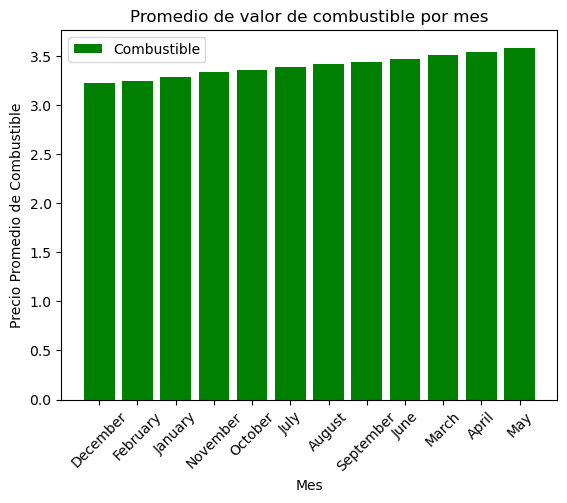

In [117]:
#Grafico agrup 1 walmart
fig, ax = plt.subplots() # Se crea la carcaza 

ax.bar(agrupacion_1_walmart.index, agrupacion_1_walmart['Fuel_Price'], color='g', label='Combustible')
ax.legend() #se crea el grafico basado en el precio del combustible como eje Y y eje X como el mes

plt.title('Promedio de valor de combustible por mes')
plt.xticks(rotation=45)#Se rotan la categoria de datos para su mejor visualizacion 
plt.ylabel('Precio Promedio de Combustible')#se cambian los nombres de los ejes
plt.xlabel('Mes')
plt.show()#Se muestra el grafico

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


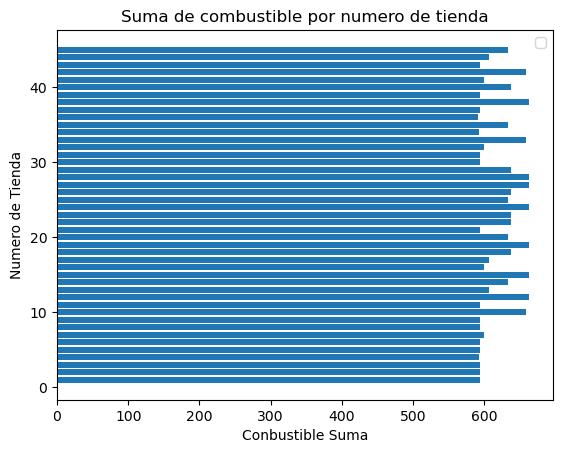

In [116]:
#Grafico agrup 2 walmart
fig, ax = plt.subplots()#Se crea la carcaza

ax.barh(agrupacion_2_walmart.index, agrupacion_2_walmart['Fuel_Price'])
ax.legend() #Se crea el grafico basado en el precio del combustible y sus tiendas

plt.title('Suma de combustible por numero de tienda')
plt.ylabel('Numero de Tienda')#Se cambian los nombres de los ejes 
plt.xlabel('Conbustible Suma')
plt.show()

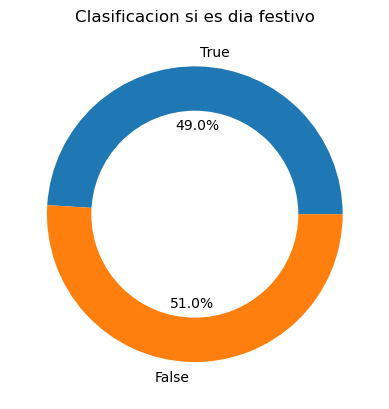

In [115]:
#Grafico agrup 3 walmart
fig, ax = plt.subplots()
ax.pie(agrupacion_3_walmart['Fuel_Price'], labels=agrupacion_3_walmart['IsHoliday'], autopct='%1.1f%%')
#Se crea el grafico de torta para luego convertirlo en anillo


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.title('Clasificacion si es dia festivo')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Se dibuja un círculo en el centro para convertirlo en un gráfico de anillos

plt.show()

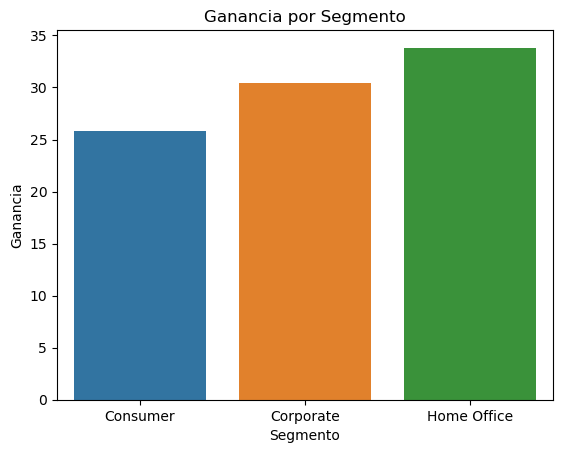

In [113]:
#Grafico agrup 1 ventas

sns.barplot(x='Segment', y='Profit', data=agrupacion_1_ventas)

plt.title('Ganancia por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Ganancia')
#Se crea el grafico de barras por tipo de segmento y ganancia 

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


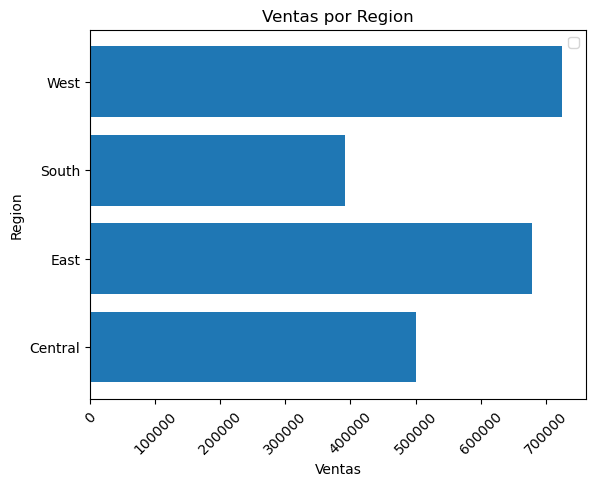

In [112]:
#Grafico agrup 2 ventas
fig, ax = plt.subplots()# Se crea la carcaza

ax.barh(agrupacion_2_ventas.index, agrupacion_2_ventas['Sales'])
ax.legend() 
#Se hace el grafico por ventas y por region 

plt.xticks(rotation=45)#se gira el label para mejor visualizacion
plt.title('Ventas por Region')
plt.ylabel('Region')
plt.xlabel('Ventas')
plt.show()

C:\Users\ce02971\AppData\Local\Temp\ipykernel_13720\455631156.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Quantity', hue='Sub-Category', data=agrupacion_3_ventas, ci=None)


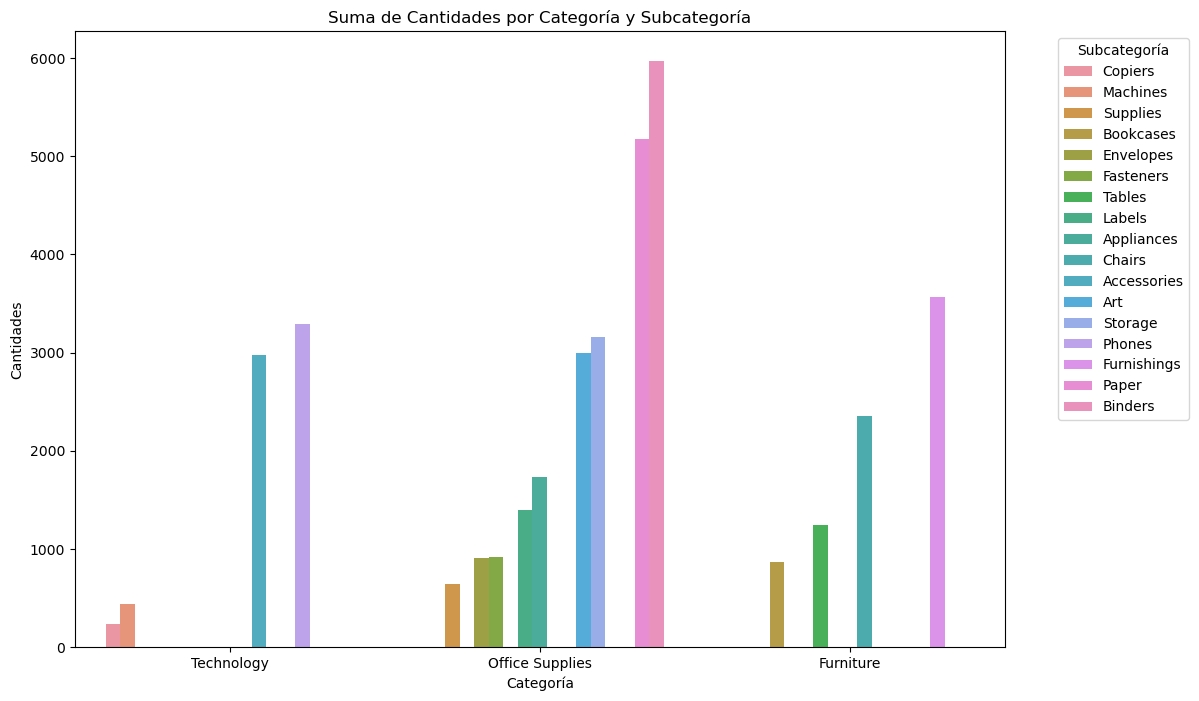

In [109]:
#Grafico agrup 3 Ventas
plt.figure(figsize=(12, 8)) #se establece el tamaño del grafico

sns.barplot(x='Category', y='Quantity', hue='Sub-Category', data=agrupacion_3_ventas, ci=None)
#Se crea el histograma por categoria y subcategoria

plt.title('Suma de Cantidades por Categoría y Subcategoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidades')
plt.legend(title='Subcategoría', bbox_to_anchor=(1.05, 1), loc='upper left')
#se añade titulo y cambiamos el nombre de los ejes

plt.show()